In [1]:
import numpy as np
import pandas as pd
import plotnine as p9

In [2]:
results = pd.read_csv("results.csv")
metadata = pd.read_csv("visium_meta.csv")

In [3]:
# mean r2 and rmse, aggregate folds
results = results.groupby(['dataset_name', 'function_name']).mean().reset_index()

In [4]:
results = results.merge(metadata, left_on='dataset_name', right_on='slide_name', how='left')

In [5]:
# how many datasets per major_labl
results.groupby('patient_group').count() / 6

,dataset_name,function_name,r2,rmse,slide_name,patient,patient_region_id,major_labl,batch,hca_sample_id
patient_group,,,,,,,,,,
group_1,18.666667,18.666667,18.666667,18.666667,18.666667,18.666667,18.666667,18.666667,18.666667,18.666667
group_2,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
group_3,6.666667,6.666667,6.666667,6.666667,6.666667,6.666667,6.666667,6.666667,6.666667,6.666667


In [6]:
## patient_group, group_1 to myogenic, 2 to ischemic, 3 to fibrotic
results['patient_group'] = results['patient_group'].replace({'group_1': 'Myogenic\n(n=14)', 'group_2': 'Ischemic\n(n=9)', 'group_3': 'Fibrotic\n(n=5)'})

In [7]:
# Rename functions
name_dict = {'cosine': 'Cosine similarity',
             'jaccard': 'Jaccard index',
             'masked_spearman': 'Masked Spearman',
             'pearson': 'Pearson correlation',
             'morans': 'Moran\'s R',
             'spearman': 'Spearman correlation',
             }
results['function_name'].replace(name_dict, inplace=True)

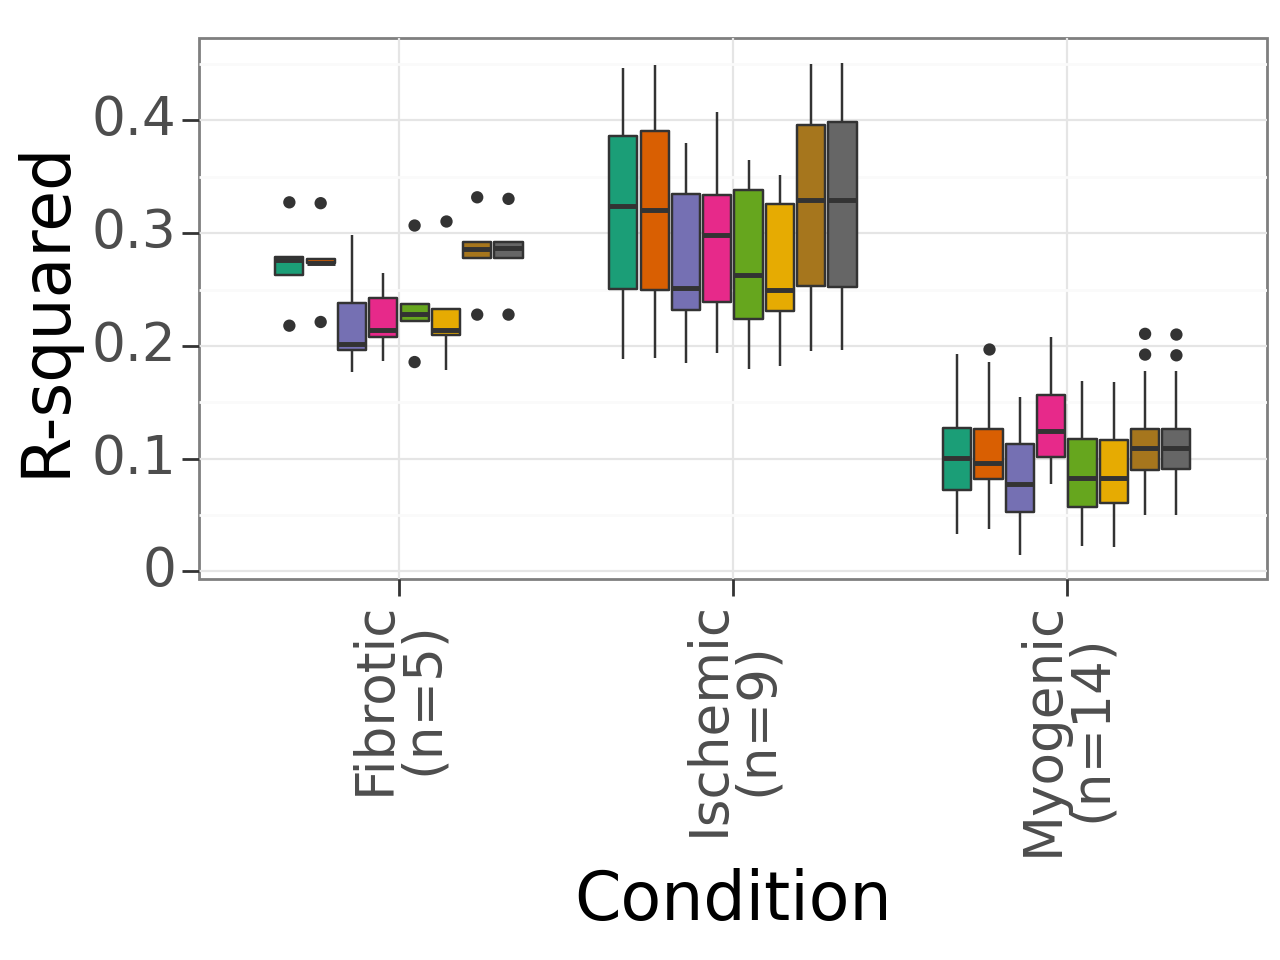

<Figure Size: (640 x 480)>

In [8]:
# boxplot plot of r2 and rmse
(
        p9.ggplot(results, p9.aes(x='patient_group', y='r2', fill='function_name')) +
        p9.geom_boxplot() +
        p9.theme_bw(base_size=24) +
        p9.scale_fill_brewer(type='qual', palette='Dark2') +
        p9.theme(axis_text_x=p9.element_text(angle=90)) +
        p9.labs(x='Condition', y='R-squared', fill='Metric') +
        # remove legend
        p9.theme(legend_position='none')
        
)

In [9]:
results

,dataset_name,function_name,r2,rmse,slide_name,patient,patient_region_id,patient_group,major_labl,batch,hca_sample_id
0,AKK001_157785,Cosine similarity,0.183009,0.062979,AKK001_157785,P5,RZ/FZ_P5,Myogenic\n(n=14),FZ,10X,10X0027
1,AKK001_157785,Jaccard index,0.185841,0.062639,AKK001_157785,P5,RZ/FZ_P5,Myogenic\n(n=14),FZ,10X,10X0027
2,AKK001_157785,Masked Spearman,0.150023,0.066401,AKK001_157785,P5,RZ/FZ_P5,Myogenic\n(n=14),FZ,10X,10X0027
3,AKK001_157785,Moran's R,0.170505,0.062329,AKK001_157785,P5,RZ/FZ_P5,Myogenic\n(n=14),FZ,10X,10X0027
4,AKK001_157785,norm_product,0.192282,0.062088,AKK001_157785,P5,RZ/FZ_P5,Myogenic\n(n=14),FZ,10X,10X0027
...,...,...,...,...,...,...,...,...,...,...,...
219,Visium_9_CK287,Moran's R,0.272683,0.073753,Visium_9_CK287,P9,GT/IZ_P9,Ischemic\n(n=9),IZ,ACH,ACH0012
220,Visium_9_CK287,norm_product,0.303678,0.073272,Visium_9_CK287,P9,GT/IZ_P9,Ischemic\n(n=9),IZ,ACH,ACH0012
221,Visium_9_CK287,Pearson correlation,0.245217,0.080805,Visium_9_CK287,P9,GT/IZ_P9,Ischemic\n(n=9),IZ,ACH,ACH0012
222,Visium_9_CK287,product,0.303551,0.073282,Visium_9_CK287,P9,GT/IZ_P9,Ischemic\n(n=9),IZ,ACH,ACH0012


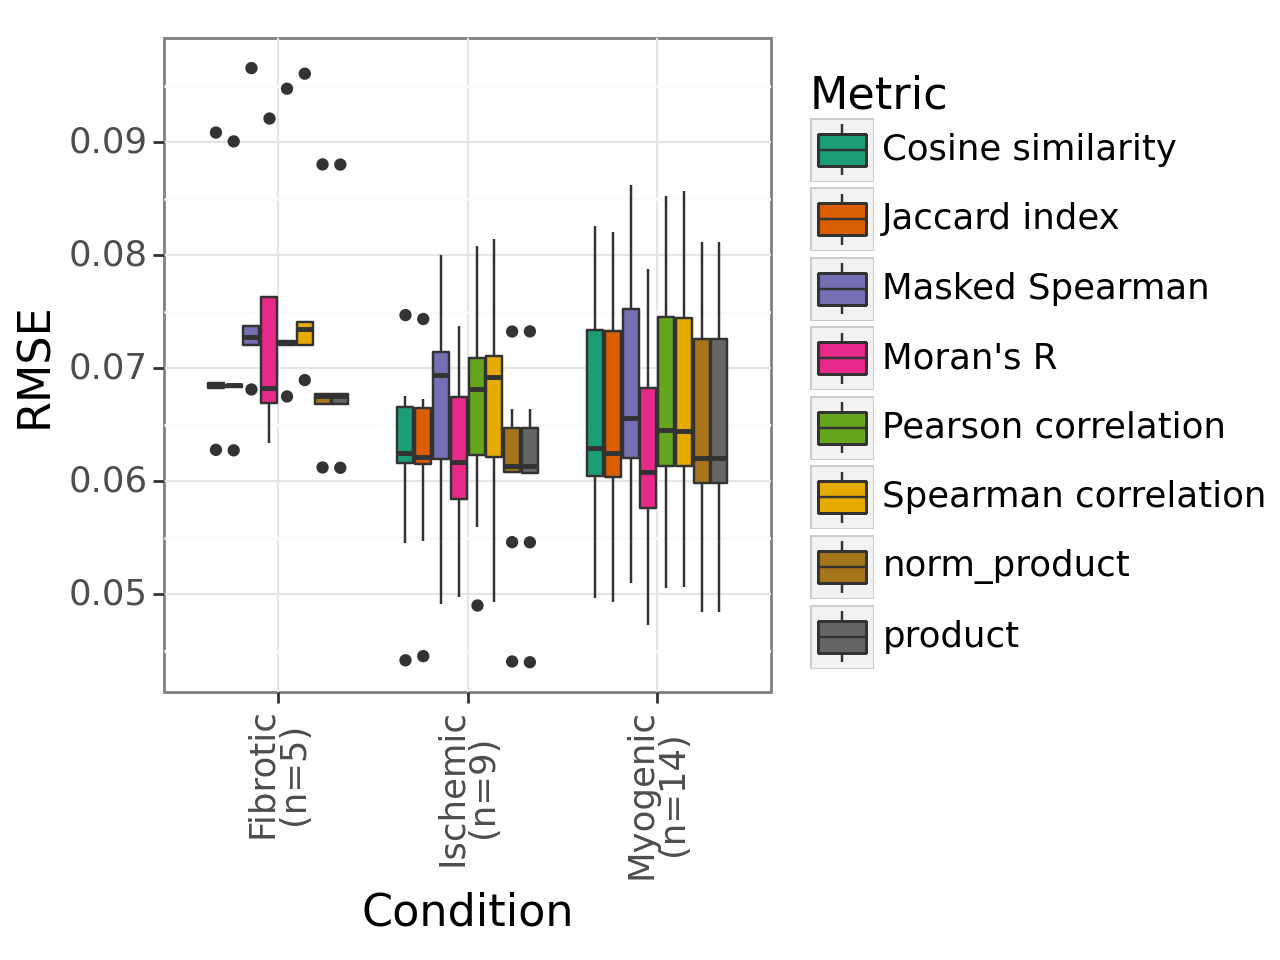

<Figure Size: (640 x 480)>

In [10]:
import matplotlib.pyplot as plt

# boxplot plot of r2 and rmse
(
        p9.ggplot(results, p9.aes(x='patient_group', y='rmse', fill='function_name')) +
        p9.geom_boxplot() +
        p9.theme_bw(base_size=16) +
        p9.scale_fill_brewer(type='qual', palette='Dark2') +
        p9.theme(axis_text_x=p9.element_text(angle=90)) +
        p9.labs(x='Condition', y='RMSE', fill='Metric')
        
)

In [11]:
results.groupby(['function_name', 'patient_group'])[['r2', 'rmse']].mean()

r2      rmse
function_name        patient_group                       
Cosine similarity    Fibrotic\n(n=5)   0.272533  0.071872
                     Ischemic\n(n=9)   0.323647  0.062123
                     Myogenic\n(n=14)  0.108291  0.065688
Jaccard index        Fibrotic\n(n=5)   0.274559  0.071666
                     Ischemic\n(n=9)   0.324350  0.062019
                     Myogenic\n(n=14)  0.110098  0.065491
Masked Spearman      Fibrotic\n(n=5)   0.222164  0.076666
                     Ischemic\n(n=9)   0.271003  0.066388
                     Myogenic\n(n=14)  0.083308  0.067686
Moran's R            Fibrotic\n(n=5)   0.222928  0.073424
                     Ischemic\n(n=9)   0.295516  0.062350
                     Myogenic\n(n=14)  0.128936  0.062999
Pearson correlation  Fibrotic\n(n=5)   0.235856  0.075819
                     Ischemic\n(n=9)   0.274456  0.066277
                     Myogenic\n(n=14)  0.091514  0.067096
Spearman correlation Fibrotic\n(n=5)   0.229250  0.076954
                     Ischemic\n(n=9)   0.268826  0.066906
                     Myogenic\n(n=14)  0.090260  0.067160
norm_product         Fibrotic\n(n=5)   0.283123  0.070283
                     Ischemic\n(n=9)   0.331053  0.061196
                     Myogenic\n(n=14)  0.117219  0.064851
product              Fibrotic\n(n=5)   0.283018  0.070275
                     Ischemic\n(n=9)   0.331561  0.061179
                     Myogenic\n(n=14)  0.117077  0.064857